In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import os

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [21]:
# Set data and file path
data_path = ['C:/Users/data']
file_path = os.sep.join(data_path + ['kaggle_marketing_campaign.csv'])

# Read-in dataset
orig_df = pd.read_csv(file_path)

orig_df.dtypes
# orig_df.head()
# orig_df.shape

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [3]:
# Remove the few rows with missing income
non_nan_df = orig_df[orig_df['Income'].notna()]

# Exclude columns that do not provide value
cols_to_retain = [col for col in non_nan_df.columns if col not in ['ID', 'Z_CostContact', 'Z_Revenue']]
# non_nan_df_cols

trimmed_df = non_nan_df[cols_to_retain].reset_index(drop=True)
trimmed_df

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2211        1967  Graduation        Married  61223.0        0         1   
2212        1946         PhD       Together  64014.0        2         1   
2213        1981  Graduation       Divorced  56981.0        0         0   
2214        1956      Master       Together  69245.0        0         1   
2215        1954         PhD        Married  52869.0        1         1   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
0       4/9/2012       58       635         88  ...                   10   
1       8/3/2014       38        11          1  ...                    1   
2     21-08-2013       26       426         49  ...                    2   
3      10/2/2014       26        11          4  ...                    0   
4     19-01-2014       94       173         43  ...                    3   
...          ...      ...       ...        ...  ...                  ...   
2211  13-06-2013       46       709         43  ...                    3   
2212   10/6/2014       56       406          0  ...                    2   
2213  25-01-2014       91       908         48  ...                    3   
2214  24-01-2014        8       428         30  ...                    5   
2215  15-10-2012       40        84          3  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2211                  4                  5             0             0   
2212                  5                  7             0             0   
2213                 13                  6             0             1   
2214                 10                  3             0             0   
2215                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2211             0             0             0         0         0  
2212             0             1             0         0         0  
2213             0             0             0         0         0  
2214             0             0             0         0         0  
2215             0             0             0         0         1  

[2216 rows x 26 columns]

In [4]:
numeric_cols = [cols for cols in trimmed_df if trimmed_df[cols].dtype != object and cols != 'Response']

# Get correlation of numeric values
corr_mat = trimmed_df[numeric_cols].corr()

# Strip out the diagonal values for the next step
for x in range(len(numeric_cols)):
    corr_mat.iloc[x,x] = 0.0

corr_mat

Year_Birth    Income   Kidhome  Teenhome   Recency  \
Year_Birth             0.000000 -0.161791  0.233615 -0.350791 -0.016295   
Income                -0.161791  0.000000 -0.428669  0.019133 -0.003970   
Kidhome                0.233615 -0.428669  0.000000 -0.039869  0.011492   
Teenhome              -0.350791  0.019133 -0.039869  0.000000  0.013838   
Recency               -0.016295 -0.003970  0.011492  0.013838  0.000000   
MntWines              -0.159451  0.578650 -0.497336  0.003747  0.015721   
MntFruits             -0.017747  0.430842 -0.373396 -0.176558 -0.005844   
MntMeatProducts       -0.033697  0.584633 -0.439261 -0.261122  0.022518   
MntFishProducts       -0.040425  0.438871 -0.388884 -0.205242  0.000551   
MntSweetProducts      -0.020204  0.440744 -0.378026 -0.163056  0.025110   
MntGoldProds          -0.064208  0.325916 -0.355029 -0.019887  0.017663   
NumDealsPurchases     -0.058668 -0.083101  0.216913  0.386246  0.002115   
NumWebPurchases       -0.153051  0.387878 -0.371977  0.162077 -0.005641   
NumCatalogPurchases   -0.121764  0.589162 -0.504501 -0.112692  0.024081   
NumStorePurchases     -0.127891  0.529362 -0.501349  0.049737 -0.000434   
NumWebVisitsMonth      0.123904 -0.553088  0.447477  0.131240 -0.018564   
AcceptedCmp3           0.061784 -0.016174  0.016066 -0.042522 -0.032257   
AcceptedCmp4          -0.066109  0.184400 -0.162026  0.038376  0.017566   
AcceptedCmp5           0.010575  0.335943 -0.205305 -0.190791 -0.000482   
AcceptedCmp1          -0.009611  0.276820 -0.174163 -0.144855 -0.021061   
AcceptedCmp2          -0.006717  0.087545 -0.081868 -0.015521 -0.001400   
Complain              -0.030407 -0.027225  0.040978  0.003307  0.013637   

                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Year_Birth          -0.159451  -0.017747        -0.033697        -0.040425   
Income               0.578650   0.430842         0.584633         0.438871   
Kidhome             -0.497336  -0.373396        -0.439261        -0.388884   
Teenhome             0.003747  -0.176558        -0.261122        -0.205242   
Recency              0.015721  -0.005844         0.022518         0.000551   
MntWines             0.000000   0.387024         0.568860         0.397721   
MntFruits            0.387024   0.000000         0.547822         0.593431   
MntMeatProducts      0.568860   0.547822         0.000000         0.573574   
MntFishProducts      0.397721   0.593431         0.573574         0.000000   
MntSweetProducts     0.390326   0.571606         0.535136         0.583867   
MntGoldProds         0.392731   0.396487         0.359446         0.427142   
NumDealsPurchases    0.008886  -0.134512        -0.121308        -0.143241   
NumWebPurchases      0.553786   0.302039         0.307090         0.299688   
NumCatalogPurchases  0.634753   0.486263         0.734127         0.532757   
NumStorePurchases    0.640012   0.458491         0.486006         0.457745   
NumWebVisitsMonth   -0.321978  -0.418729        -0.539484        -0.446423   
AcceptedCmp3         0.061463   0.014424         0.018438        -0.000219   
AcceptedCmp4         0.373143   0.006396         0.091618         0.016105   
AcceptedCmp5         0.473550   0.212871         0.376867         0.196277   
AcceptedCmp1         0.351417   0.191816         0.313076         0.261608   
AcceptedCmp2         0.206185  -0.009980         0.043521         0.002345   
Complain            -0.039470  -0.005324        -0.023782        -0.021220   

                     MntSweetProducts  ...  NumWebPurchases  \
Year_Birth                  -0.020204  ...        -0.153051   
Income                       0.440744  ...         0.387878   
Kidhome                     -0.378026  ...        -0.371977   
Teenhome                    -0.163056  ...         0.162077   
Recency                      0.025110  ...        -0.005641   
MntWines                     0.390326  ...         0.553786   
MntFruits                    0.571606  ...         0.302039

In [5]:
# Pairwise maximal correlations
corr_mat.abs().idxmax()

Year_Birth                        Teenhome
Income                 NumCatalogPurchases
Kidhome                NumCatalogPurchases
Teenhome                 NumDealsPurchases
Recency                       AcceptedCmp3
MntWines                 NumStorePurchases
MntFruits                  MntFishProducts
MntMeatProducts        NumCatalogPurchases
MntFishProducts                  MntFruits
MntSweetProducts           MntFishProducts
MntGoldProds           NumCatalogPurchases
NumDealsPurchases                 Teenhome
NumWebPurchases                   MntWines
NumCatalogPurchases        MntMeatProducts
NumStorePurchases                 MntWines
NumWebVisitsMonth                   Income
AcceptedCmp3                  MntGoldProds
AcceptedCmp4                      MntWines
AcceptedCmp5                      MntWines
AcceptedCmp1                  AcceptedCmp5
AcceptedCmp2                  AcceptedCmp4
Complain                           Kidhome
dtype: object

In [6]:
# Check for skewness
skew_columns = (trimmed_df[numeric_cols]
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

Complain               10.132737
AcceptedCmp2            8.424753
Income                  6.763487
AcceptedCmp1            3.562482
AcceptedCmp5            3.282143
AcceptedCmp3            3.269397
AcceptedCmp4            3.256758
NumDealsPurchases       2.415272
MntSweetProducts        2.103328
MntFruits               2.101658
MntMeatProducts         2.025577
MntFishProducts         1.916369
NumCatalogPurchases     1.881075
MntGoldProds            1.839231
NumWebPurchases         1.197037
MntWines                1.170720
dtype: float64

In [7]:
# Perform log transform on skewed columns
for col in skew_columns.index.tolist():
    trimmed_df[col] = np.log1p(trimmed_df[col])

In [8]:
# Scale numeric columns for plotting correlation matrix
from sklearn.preprocessing import StandardScaler

scaled_df = trimmed_df.copy()

sc = StandardScaler()
scaled_df[numeric_cols] = sc.fit_transform(scaled_df[numeric_cols])
scaled_df.dtypes

Year_Birth             float64
Education               object
Marital_Status          object
Income                 float64
Kidhome                float64
Teenhome               float64
Dt_Customer             object
Recency                float64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
AcceptedCmp3           float64
AcceptedCmp4           float64
AcceptedCmp5           float64
AcceptedCmp1           float64
AcceptedCmp2           float64
Complain               float64
Response                 int64
dtype: object

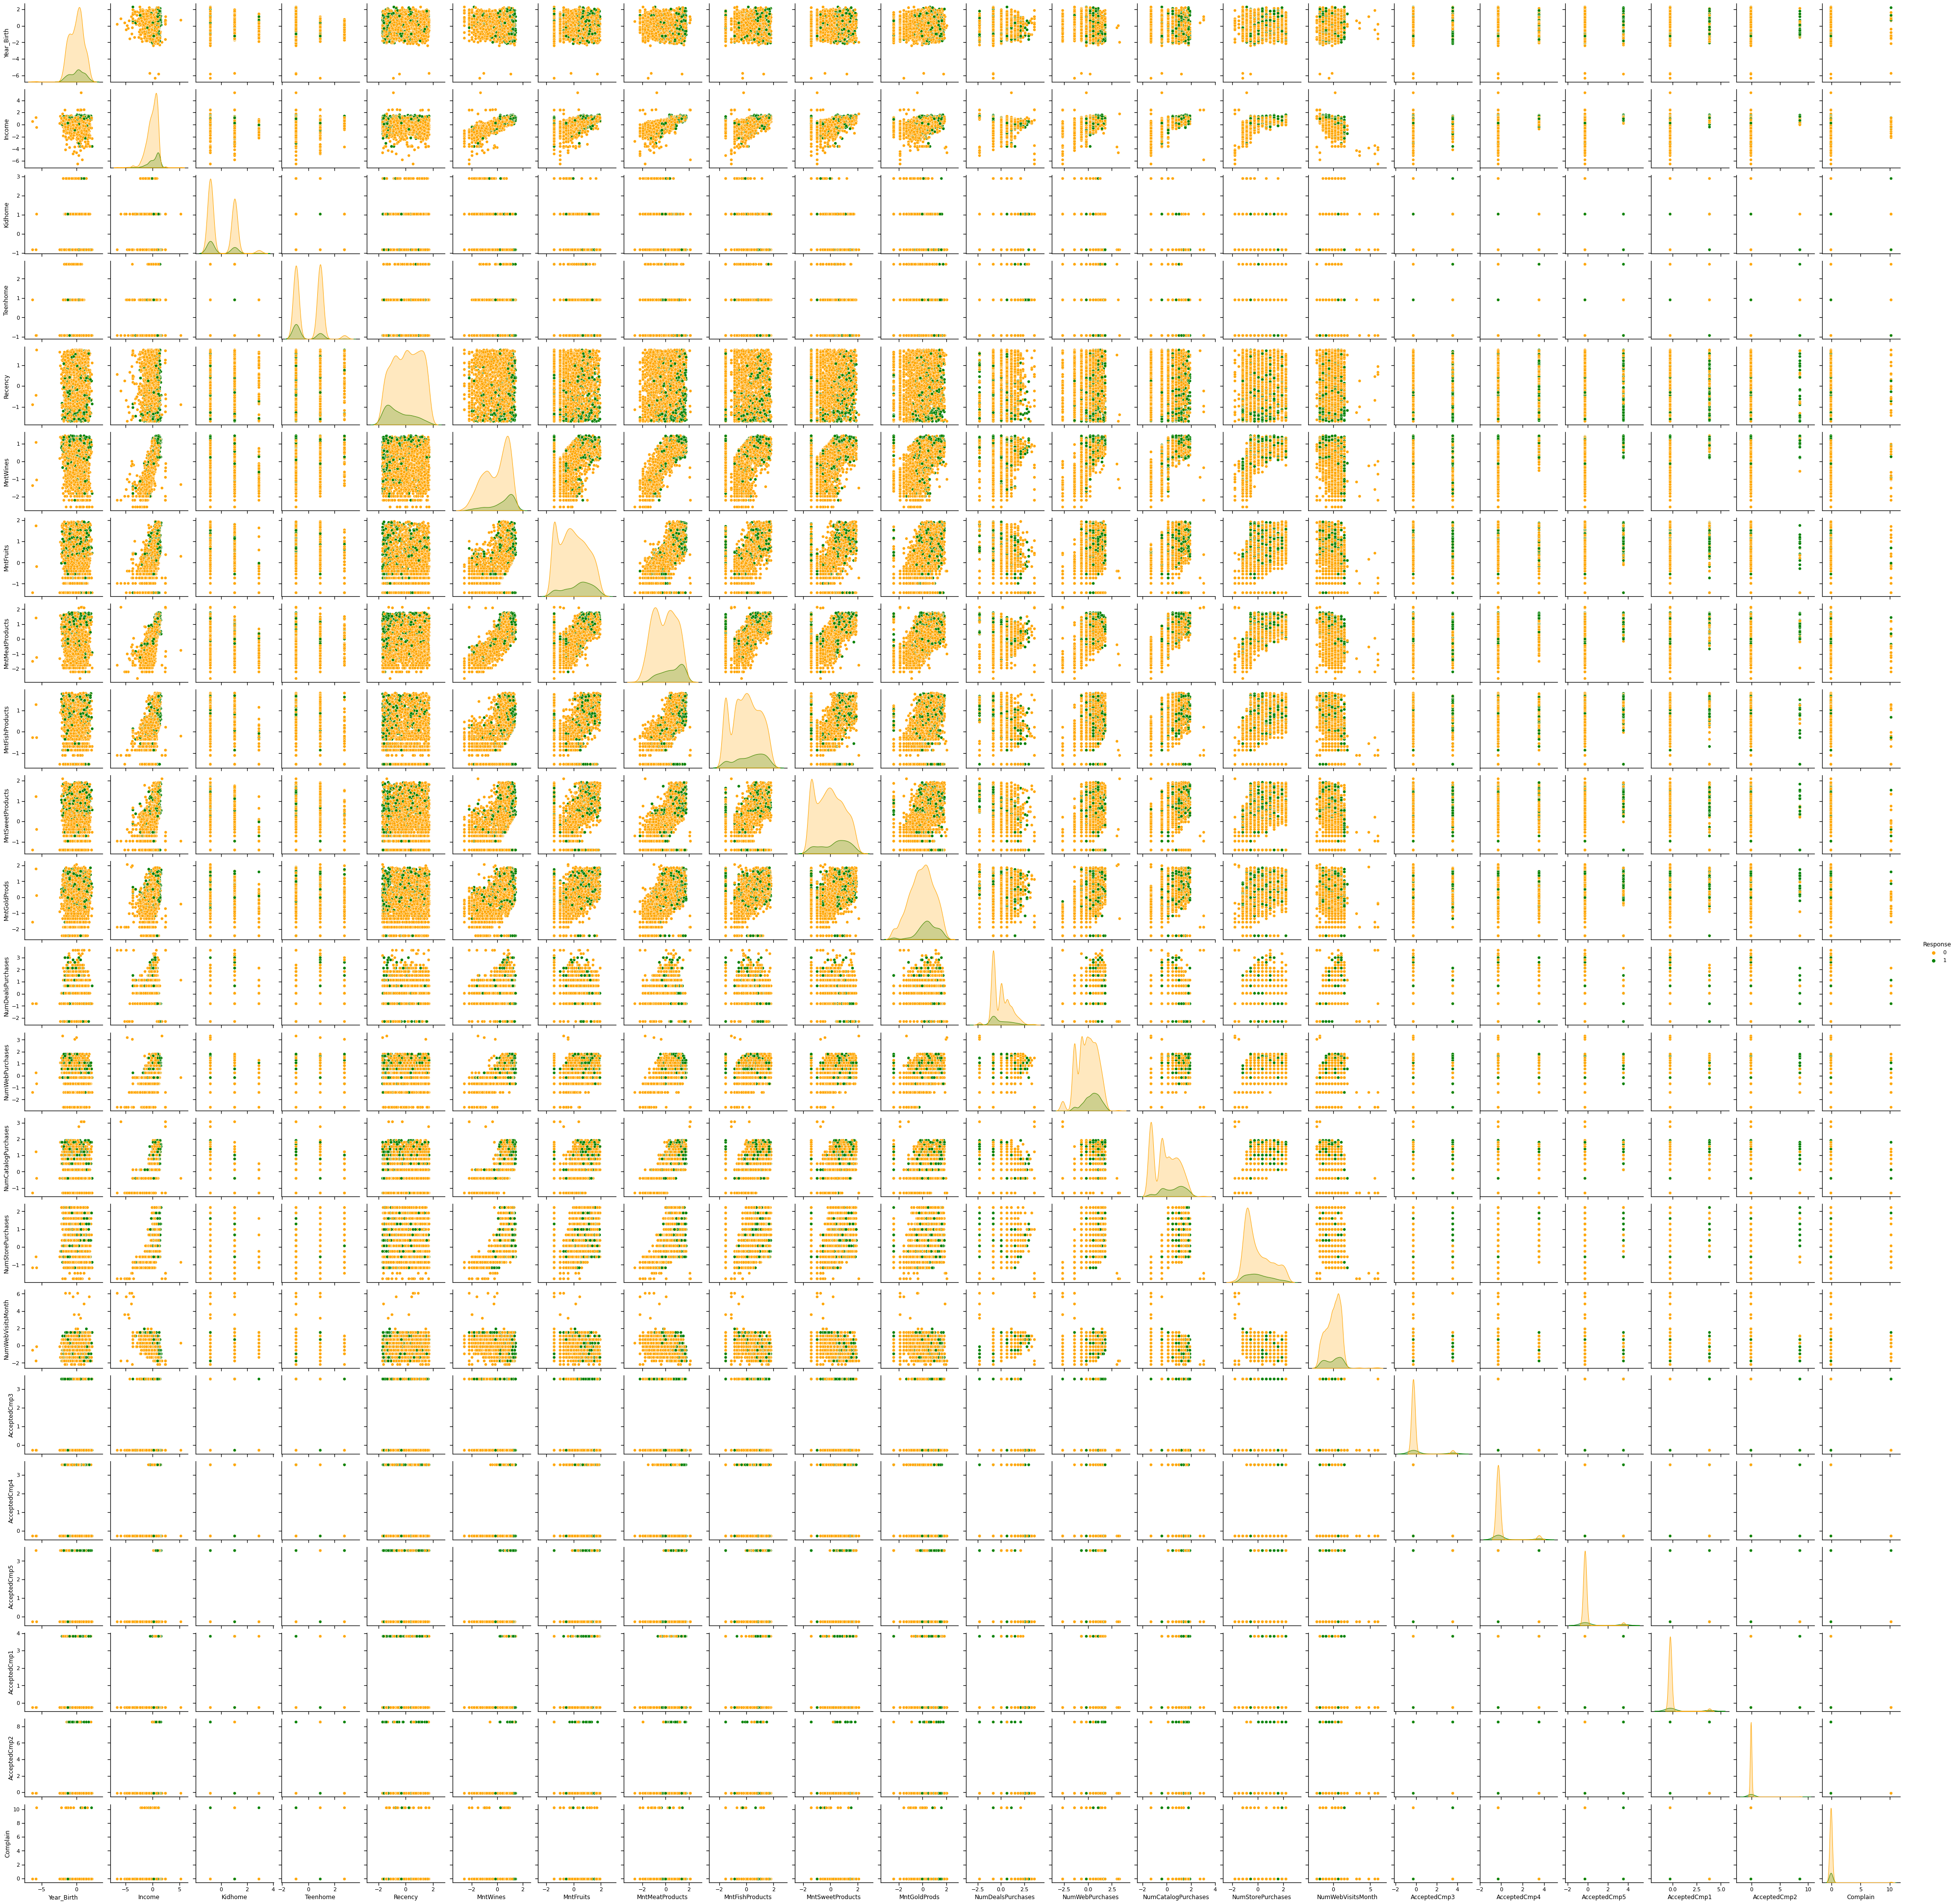

In [9]:
# Get pairplot of scaled features
sns.set_context('notebook')
sns.pairplot(scaled_df[numeric_cols + ['Response']], 
             hue='Response', 
             hue_order=[0, 1],
             palette={0:'orange', 1:'green'});

In [10]:
# Get independent and dependent variables
X_columns = [cols for cols in scaled_df.columns if cols != 'Response']

X_non_encoded = scaled_df[X_columns]
X_non_encoded

y_non_scaled = scaled_df['Response']
y_non_scaled

# X = scaled_df[X_columns].values
# y = scaled_df['Response'].values

0       1
1       0
2       0
3       0
4       0
       ..
2211    0
2212    0
2213    0
2214    0
2215    1
Name: Response, Length: 2216, dtype: int64

In [11]:
# Encode independent categorical columns (One-hot, in this case)
one_hot_encode_cols = X_non_encoded.dtypes[X_non_encoded.dtypes == object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()
X_encoded_df = pd.get_dummies(X_non_encoded, columns=one_hot_encode_cols, drop_first=True)
X_encoded_df.info()
X_encoded_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Columns: 694 entries, Year_Birth to Dt_Customer_9/9/2013
dtypes: float64(22), uint8(672)
memory usage: 1.8 MB


Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0      -0.986443  0.428623 -0.823039 -0.928972  0.310532  0.984704   1.430700   
1      -1.236801 -0.019686  1.039938  0.909066 -0.380509 -1.214599  -0.987662   
2      -0.318822  0.840808 -0.823039 -0.928972 -0.795134  0.764006   1.063301   
3       1.266777 -1.114019  1.039938 -0.928972 -0.795134 -1.214599  -0.403832   
4       1.016420  0.433888  1.039938 -0.928972  1.554407  0.266718   0.981849   
...          ...       ...       ...       ...       ...       ...        ...   
2211   -0.151917  0.530857 -0.823039  0.909066 -0.104093  1.045674   0.981849   
2212   -1.904422  0.619003  2.902916  0.909066  0.241428  0.737433  -1.429313   
2213    1.016420  0.388876 -0.823039 -0.928972  1.450751  1.182541   1.050428   
2214   -1.069896  0.774319 -0.823039  0.909066 -1.417072  0.766594   0.758712   
2215   -1.236801  0.240775  1.039938  0.909066 -0.311405 -0.130127  -0.546011   

      MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0            1.393131         1.578200          1.411177  ...   
1           -1.398987        -0.869044         -0.972475  ...   
2            0.462699         1.315777          0.533457  ...   
3           -0.695206        -0.084848         -0.537163  ...   
4            0.415994         0.791674          0.684912  ...   
...               ...              ...               ...  ...   
2211         0.691689         0.737989          1.593610  ...   
2212        -0.445712        -1.532123         -1.407787  ...   
2213         0.803801         0.578231          0.203058  ...   
2214         0.794924         1.120193          0.748834  ...   
2215        -0.001676        -0.869044         -0.972475  ...   

      Dt_Customer_9/4/2014  Dt_Customer_9/5/2013  Dt_Customer_9/5/2014  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2211                     0                     0                     0   
2212                     0                     0                     0   
2213                     0                     0                     0   
2214                     0                     0                     0   
2215                     0                     0                     0   

      Dt_Customer_9/6/2013  Dt_Customer_9/6/2014  Dt_Customer_9/7/2013  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...                   ...                   ...   
2211                     0                     0                     0   
2212                     0                     0                     0   
2213                     0                     0                     0   
2214                     0                     0                     0   
2215                     0                     0                     0   

      Dt_Customer_9/8/2012  Dt_Customer_9/8/2013  Dt_Customer_9/9/2012  \
0                        0                     0                     0   
1                        0                     0                     0   
2                        0                     0                     0   
3                        0                     0                     0   
4                        0                     0                     0   
...                    ...    

In [12]:
# Scaled and Encoded Independent Variables
X_data = X_encoded_df.values
X_data

array([[-0.98644293,  0.42862317, -0.82303932, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23680074, -0.01968606,  1.03993835, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31882209,  0.84080758, -0.82303932, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.01641959,  0.38887611, -0.82303932, ...,  0.        ,
         0.        ,  0.        ],
       [-1.06989553,  0.77431909, -0.82303932, ...,  0.        ,
         0.        ,  0.        ],
       [-1.23680074,  0.24077454,  1.03993835, ...,  0.        ,
         0.        ,  0.        ]])

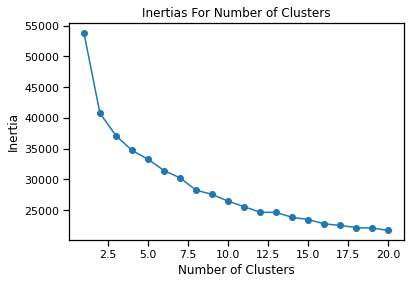

In [13]:
# K Means Clustering
from sklearn.cluster import KMeans

inertias = []

for i in range(1,21):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X_encoded_df)
    inertias.append(kmeans.inertia_)
    
# Plot inertia for different values of K
import matplotlib.pyplot as plt

plt.plot(range(1,21), inertias, marker = 'o')
plt.title('Inertias For Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [14]:
# Ideal number of K-Means clusters is 2
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_encoded_df)

X_encoded_df['kmeans'] = kmeans.predict(X_encoded_df)
X_df_cluster = X_encoded_df.copy()

X_encoded_df = X_encoded_df.loc[ : , X_encoded_df.columns != 'kmeans']

In [15]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(X_encoded_df)

X_df_cluster['agglom'] = ag.fit_predict(X_encoded_df)
X_df_cluster

X_encoded_df = X_encoded_df.loc[ : , X_encoded_df.columns != 'agglom']

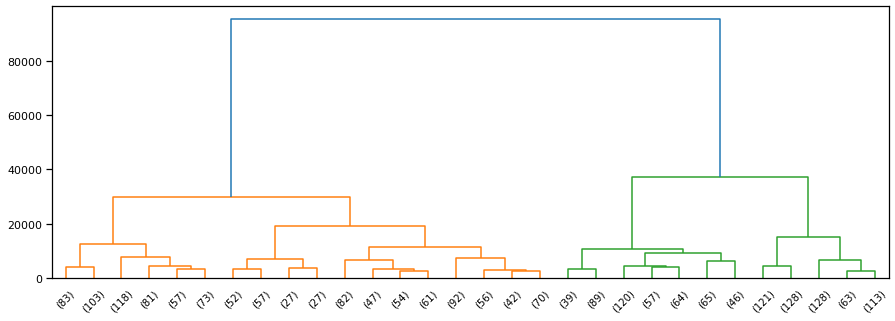

In [16]:
# Plot of the dendrogram created from Agglomerative Clustering
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p = 30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

In [17]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan_clust = DBSCAN(eps=12.5, min_samples=4)
dbscan_clust = dbscan_clust.fit(X_encoded_df)

X_encoded_df.loc[:,'Cluster'] = dbscan_clust.labels_ 

X_df_cluster['dbscan'] = dbscan_clust.fit_predict(X_encoded_df)
X_df_cluster

X_encoded_df = X_encoded_df.loc[ : , X_encoded_df.columns != 'dbscan']

In [18]:
# Add response variable
X_df_cluster = pd.merge(X_df_cluster, y_non_scaled, left_index=True, right_index=True)
X_df_cluster.head()

Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0   -0.986443  0.428623 -0.823039 -0.928972  0.310532  0.984704   1.430700   
1   -1.236801 -0.019686  1.039938  0.909066 -0.380509 -1.214599  -0.987662   
2   -0.318822  0.840808 -0.823039 -0.928972 -0.795134  0.764006   1.063301   
3    1.266777 -1.114019  1.039938 -0.928972 -0.795134 -1.214599  -0.403832   
4    1.016420  0.433888  1.039938 -0.928972  1.554407  0.266718   0.981849   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
0         1.393131         1.578200          1.411177  ...   
1        -1.398987        -0.869044         -0.972475  ...   
2         0.462699         1.315777          0.533457  ...   
3        -0.695206        -0.084848         -0.537163  ...   
4         0.415994         0.791674          0.684912  ...   

   Dt_Customer_9/6/2014  Dt_Customer_9/7/2013  Dt_Customer_9/8/2012  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Dt_Customer_9/8/2013  Dt_Customer_9/9/2012  Dt_Customer_9/9/2013  kmeans  \
0                     0                     0                     0       0   
1                     0                     0                     0       1   
2                     0                     0                     0       0   
3                     0                     0                     0       1   
4                     0                     0                     0       0   

   agglom  dbscan  Response  
0       0       0         1  
1       1       0         0  
2       0       0         0  
3       1       0         0  
4       0       0         0  

[5 rows x 698 columns]

In [19]:
# Find out the impact of having predicted kmeans and agglomerative as input into a different model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

# Assume Income is the target variable in this test
non_class_df = X_df_cluster.drop(['Response', 'kmeans', 'agglom'], axis=1)
kmeans_df = X_df_cluster.drop(['Response', 'agglom'], axis=1)
agglom_df = X_df_cluster.drop(['Response', 'kmeans'], axis=1)
dbscan_df = X_df_cluster.drop(['Response', 'dbscan'], axis=1)

y = X_df_cluster['Response']
# y.unique

sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

# Function to run Random Forest
def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

estimator = RandomForestClassifier()

roc_non_class = get_avg_roc_10splits(estimator, non_class_df, y)
roc_kmeans = get_avg_roc_10splits(estimator, kmeans_df, y)
roc_agglom = get_avg_roc_10splits(estimator, agglom_df, y)
roc_dbscan = get_avg_roc_10splits(estimator, dbscan_df, y)


print("Without clustering as input to Random Forest, roc-auc is \"{0}\"".format(roc_non_class))
print("Using K means cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_kmeans))
print("Using Agglomerative cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_agglom))
print("Using DBSCAN as input to Random Forest, roc-auc is \"{0}\"".format(roc_dbscan))

Without clustering as input to Random Forest, roc-auc is "0.8957190957190957"
Using K means cluster as input to Random Forest, roc-auc is "0.8985970819304152"
Using Agglomerative cluster as input to Random Forest, roc-auc is "0.8985169151835818"
Using DBSCAN as input to Random Forest, roc-auc is "0.89673721340388"
